In [5]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pysimul
from math import *

In [2]:
simul = pysimul.PySimul()
simul['T'] = T = 10
simul['gamma'] = gamma = 500
D = T / gamma
part_m = 0
#simul['part_m'] = part_m = 0.1
simul['reset_rate'] = α = 0.5
simul['x0sigma'] = σ = 0.2

In [3]:
simul.start()

In [27]:
simul.end()

In [4]:
simul['n_trajectories']

239

In [24]:
simul['pause'] = 1

In [21]:
i_beg = 20

In [22]:
Res = pd.DataFrame()
simul.explicit_lock()
first_times_xtarg = simul['first_times_xtarg']
for i in range(len(first_times_xtarg)):
    first_times = simul['first_times-'+str(i)]
    path = "data-poisson-x0var-m0-loctarg/"+str(i+i_beg)
    np.savetxt(path+"-ft.csv", first_times, fmt='%.2e')
    x_targ = first_times_xtarg[i]
    df = pd.DataFrame(list({
        'D': D,
        'T': T,
        'gamma': gamma,
        'part_m': part_m,
        'reset_rate': α,
        'x0sigma': σ,
        'L': x_targ,
        'L_err': simul['xtarg_tol'],
        'b': x_targ/σ,
        'c': sqrt(α/D)*x_targ,
        'c_err': sqrt(α/D)*simul['xtarg_tol'],
        'mfpt': np.mean(first_times),
        'fpt_stdev': np.std(first_times),
        'n_traj': len(first_times),
        'Delta_t': simul['Delta_t']
    }.items())).set_index(0)
    df.to_csv(path+"-params.csv", header=False, quoting=csv.QUOTE_NONE, sep=',')
    Res = Res.append(df.T, ignore_index=True, sort=False)
simul.explicit_unlock()

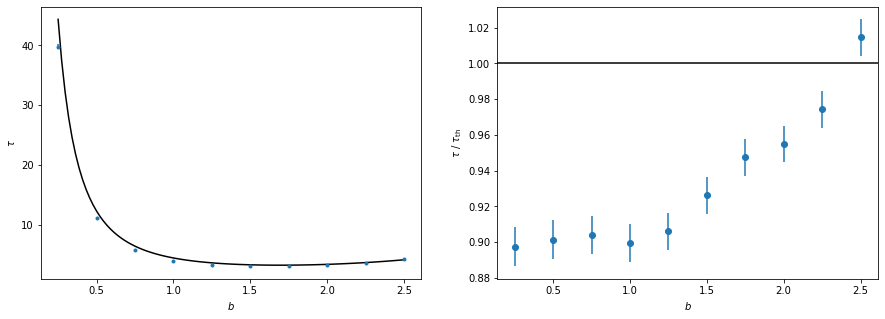

In [23]:
Res['tau'] = 4*Res['D']*Res['mfpt']/Res['L']**2
Res['tau_err'] = 4*Res['D']*(Res['fpt_stdev']/np.sqrt(Res['n_traj']))/Res['L']**2
import scipy.special as ss
tau_th = lambda b,c: 4/c**2 * ( (2*np.exp(-c**2/2/b**2)) / ( np.exp(c)*ss.erfc((c/b+b)/sqrt(2)) + np.exp(-c)*ss.erfc((c/b-b)/sqrt(2)) ) - 1 )

L = np.linspace(np.min(Res['L']), np.max(Res['L']), 100)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(L/σ, tau_th(L/σ,sqrt(α/D)*L), color='black')
ax1.errorbar(Res['b'], Res['tau'], yerr=Res['tau_err'], fmt='.')
ax1.set_ylabel(r"$\tau$")
ax1.set_xlabel(r"$b$")
ax2.errorbar(Res['b'], Res['tau']/tau_th(Res['b'],Res['c']), yerr=Res['tau_err']/tau_th(Res['b'],Res['c']), fmt='o')
ax2.axhline(y=1, color='black')
ax2.set_ylabel(r"$\tau\ /\ \tau_\operatorname{th}$")
ax2.set_xlabel(r"$b$")
None

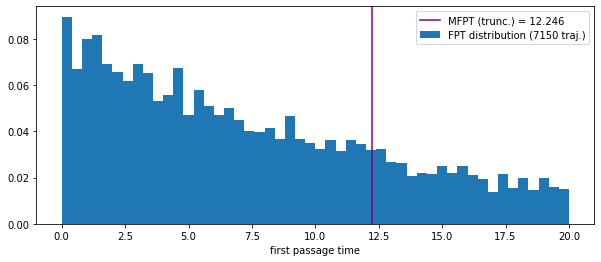

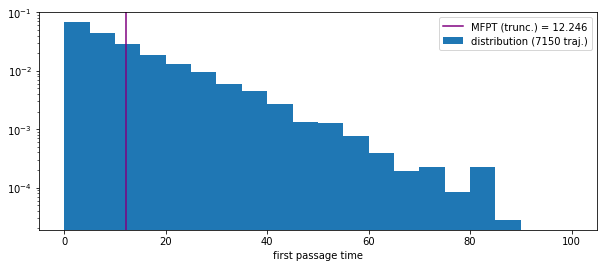

In [16]:
first_times = simul['first_times-9']
mfpt = np.mean(first_times)
n_traj = len(first_times)

plt.figure(figsize=(10,4))
plt.hist(first_times, bins=50, range=(0,20), weights=50/20*np.ones(n_traj)/n_traj, label="FPT distribution ({} traj.)".format(n_traj))
plt.axvline(x=mfpt, color='purple', label="MFPT (trunc.) = {:.3f}".format(mfpt))
plt.xlabel("first passage time")
plt.legend()

plt.figure(figsize=(10,4))
plt.hist(first_times, bins=20, range=(0,100), weights=20/100*np.ones(n_traj)/n_traj, label="distribution ({} traj.)".format(n_traj))
plt.axvline(x=mfpt, color='purple', label="MFPT (trunc.) = {:.3f}".format(mfpt))
plt.yscale('log')
plt.xlabel("first passage time")
plt.legend()